In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
claims_df = pd.read_csv('../data/processed/dim_claims_train.csv').fillna(0)
claims_df.loc[:, 'reject_code'] = claims_df['reject_code'].astype(int)

## How well does a Decision Tree predict a claim being approved (`pharmacy_claim_approved`)?
- All models are evaluated using 5-fold cross-validation.

Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0


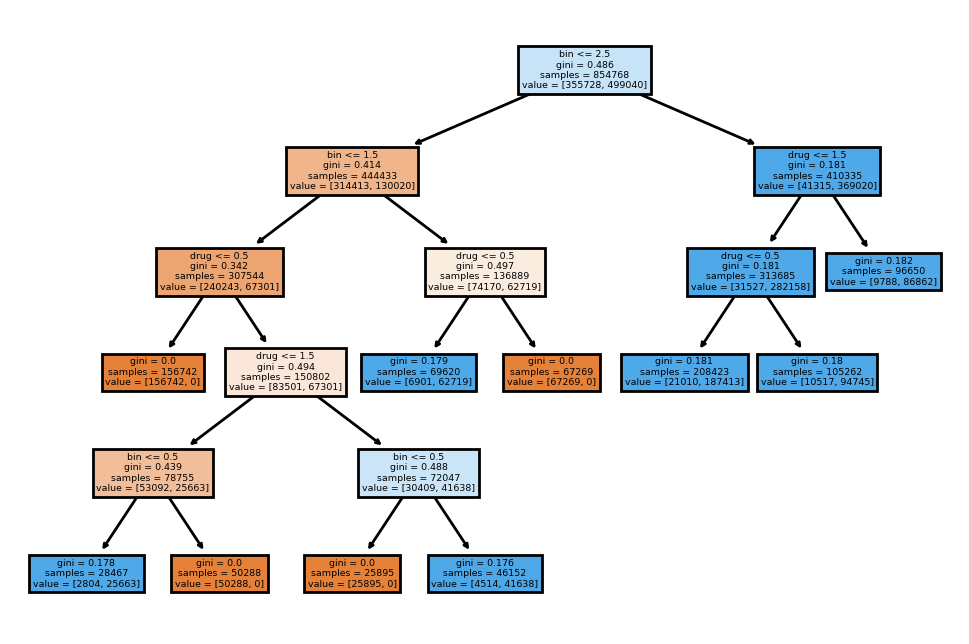

In [3]:
claims_X = claims_df[['bin', 'drug']].values
claims_y = claims_df['pharmacy_claim_approved'].values

bin_le = LabelEncoder()
claims_X[:, 0] = bin_le.fit_transform(claims_X[:, 0].astype(int))

drug_le = LabelEncoder()
claims_X[:, 1] = drug_le.fit_transform(claims_X[:, 1])

cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv.get_n_splits(claims_X)

accuracy = []
precision = []
recall = []

for train_index, test_index in cv.split(claims_X):
    X_train, X_test = claims_X[train_index], claims_X[test_index]
    y_train, y_test = claims_y[train_index], claims_y[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    
    model.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test, model.predict(X_test)))
    recall.append(recall_score(y_test, model.predict(X_test)))

accuracy = np.array(accuracy)
recall = np.array(recall)
precision = np.array(precision)

print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

f = plt.figure(dpi=200)
fig = model.fit(X_train, y_train)
plot_tree(fig, filled = True, feature_names=['bin', 'drug'])
plt.show()

### Does one-hot encoding improve the prediction?
- No quality improvement.
- Effectively produces the same decision tree.
- The model that results in the easier to interpret tree is superior.
- The one-hot encoded tree is easier to understand because we don't have to map the label encoding.

Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0


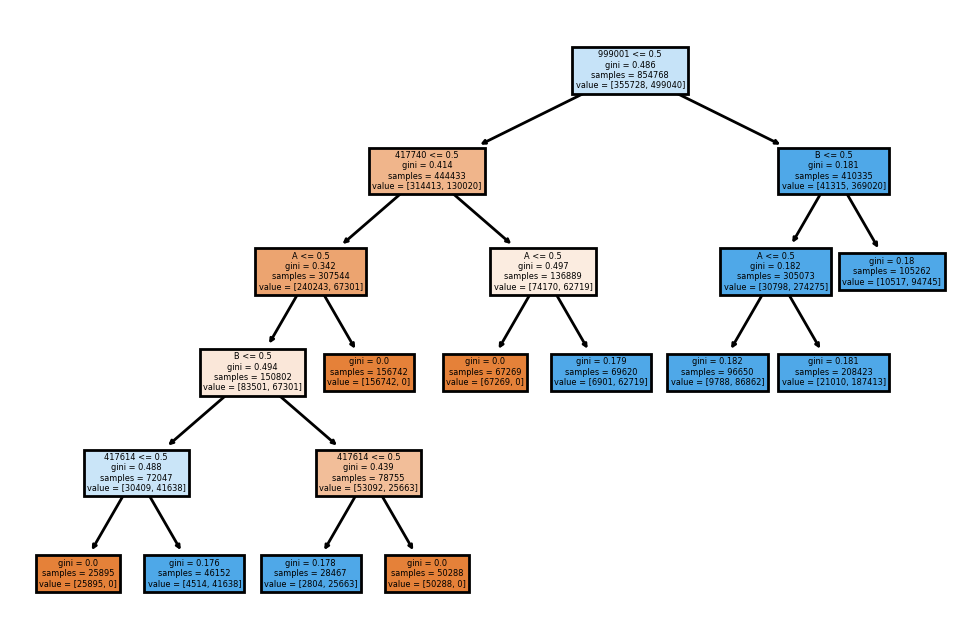

In [4]:
claims_X = claims_df[['bin', 'drug']].values
claims_y = claims_df['pharmacy_claim_approved'].values

ohe = OneHotEncoder(sparse=False)
claims_X = ohe.fit_transform(claims_X.tolist())

cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv.get_n_splits(claims_X)

accuracy = []
precision = []
recall = []

for train_index, test_index in cv.split(claims_X):
    X_train, X_test = claims_X[train_index], claims_X[test_index]
    y_train, y_test = claims_y[train_index], claims_y[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    
    model.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test, model.predict(X_test)))
    recall.append(recall_score(y_test, model.predict(X_test)))

accuracy = np.array(accuracy)
recall = np.array(recall)
precision = np.array(precision)

print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

names = [x.split('_')[1] for x in ohe.get_feature_names()]
f = plt.figure(dpi=200)
fig = model.fit(X_train, y_train)
plot_tree(fig, filled = True, feature_names=names)
plt.show()

# Hyperparameter Tuning
- Perform hyperparameter tuning on the one-hot encoded model.
- The hyperparameters of `criterion`, `splitter`, and `ccp_alpha` will be adjusted.
- It is clear hyperparameter tuning is needed, because there are two unnecessary decisions on the right hand side of the tree.

In [5]:
claims_X = claims_df[['bin', 'drug']].values
claims_y = claims_df['pharmacy_claim_approved'].values

ohe = OneHotEncoder(sparse=False, drop='first')
claims_X = ohe.fit_transform(claims_X.tolist())

## How does changing `criterion` change the result?
- No change.

In [6]:
for hyperparameter in ['gini', 'entropy']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, criterion=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test)))
        recall.append(recall_score(y_test, model.predict(X_test)))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print(f'-- {hyperparameter} --')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

-- gini --
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
-- entropy --
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0


## How does changing `splitter` change the result?
- No change.

In [7]:
for hyperparameter in ['best', 'random']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, splitter=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test)))
        recall.append(recall_score(y_test, model.predict(X_test)))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print(f'-- {hyperparameter} --')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')

-- best --
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
-- random --
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0


## How does changing the `ccp_alpha` change the result?
- Values for alpha are determined by examining the `cost_complexity_pruning_path` and using the breakpoints provided.
- We can see that an alpha value of 10^-6 will produce a tree with 2 fewer leaves and no change in prediction quality.
- The pruning results in the branch pertaining to decisions for payer `999001`.

-------------------------------------------------------------
ccp_alpha =  0.0
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
Number of Leaves = 11



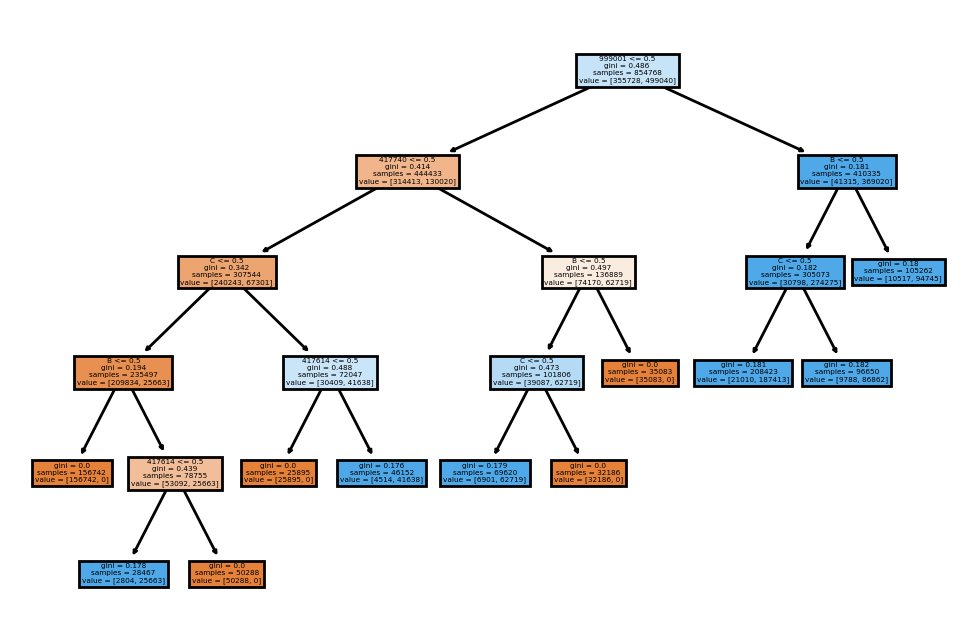

-------------------------------------------------------------
ccp_alpha =  3.3841795685218834e-08
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
Number of Leaves = 10



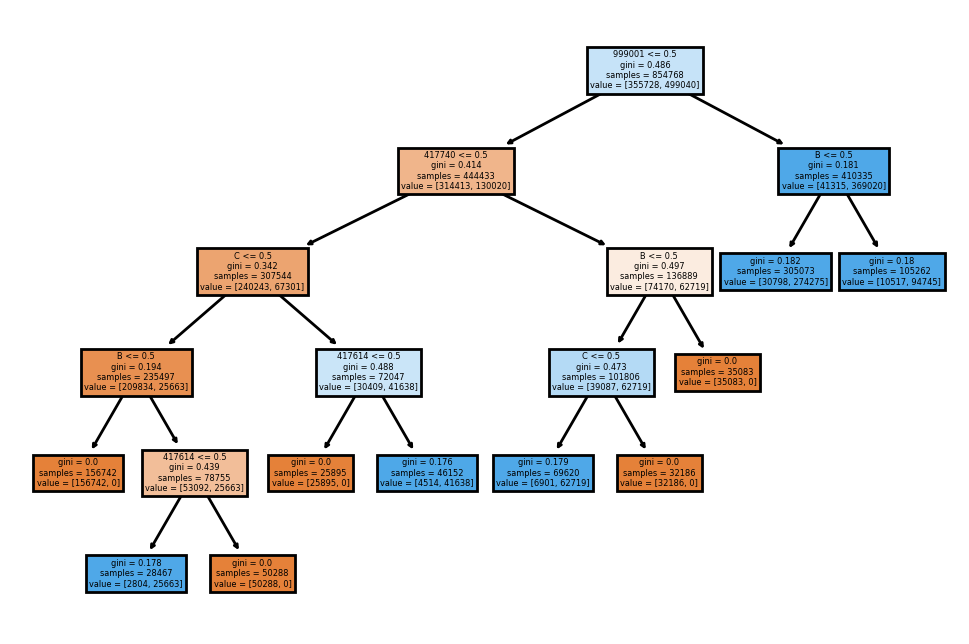

-------------------------------------------------------------
ccp_alpha =  1.9816431574837257e-07
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
Number of Leaves = 9



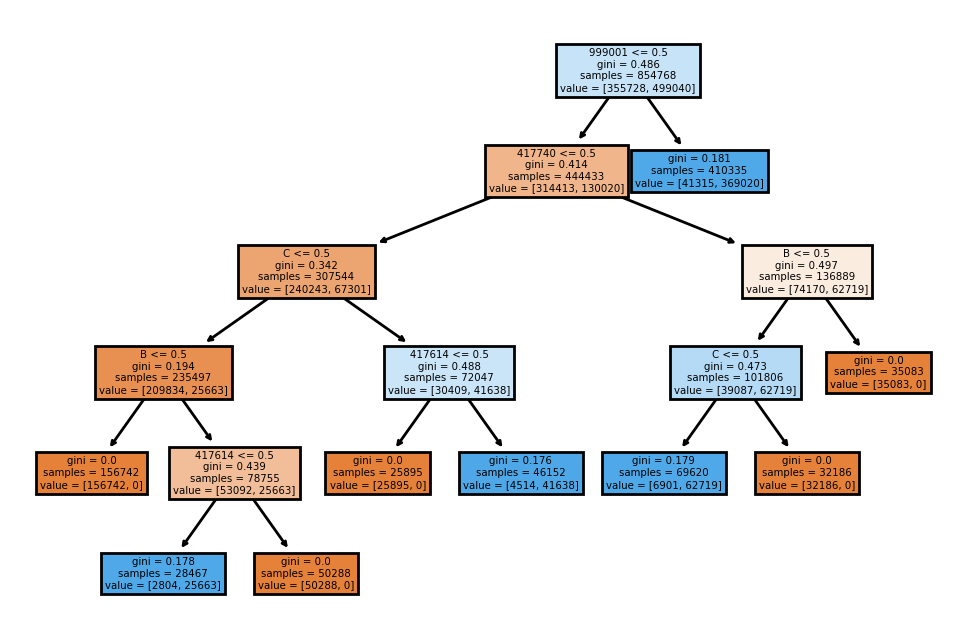

-------------------------------------------------------------
ccp_alpha =  0.023794292421381397
Decision Tree accuracy = 0.92
Decision Tree precision = 0.9
Decision Tree recall = 0.98
Number of Leaves = 7



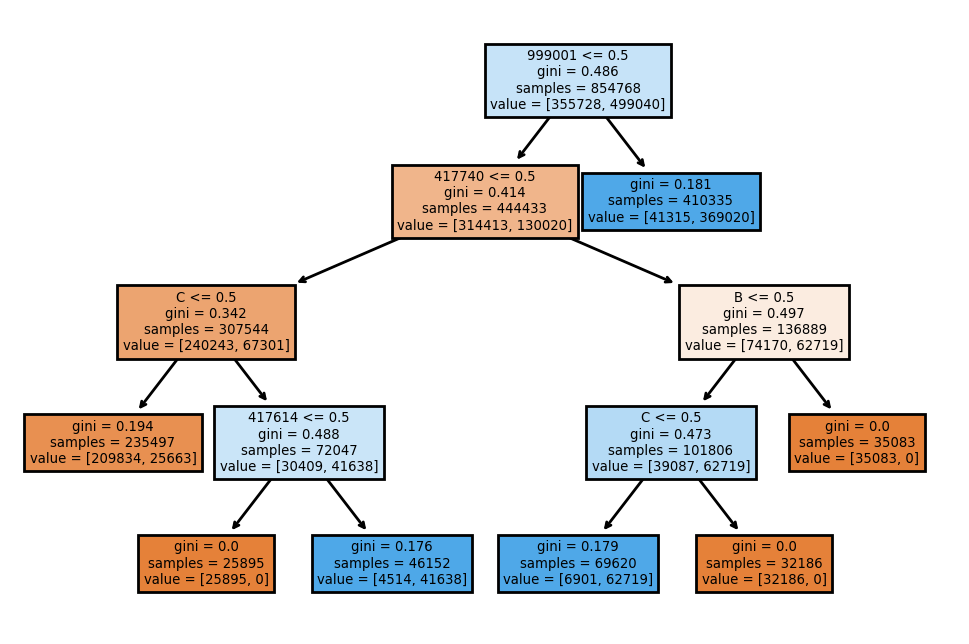

-------------------------------------------------------------
ccp_alpha =  0.027528624978272152
Decision Tree accuracy = 0.89
Decision Tree precision = 0.9
Decision Tree recall = 0.91
Number of Leaves = 2



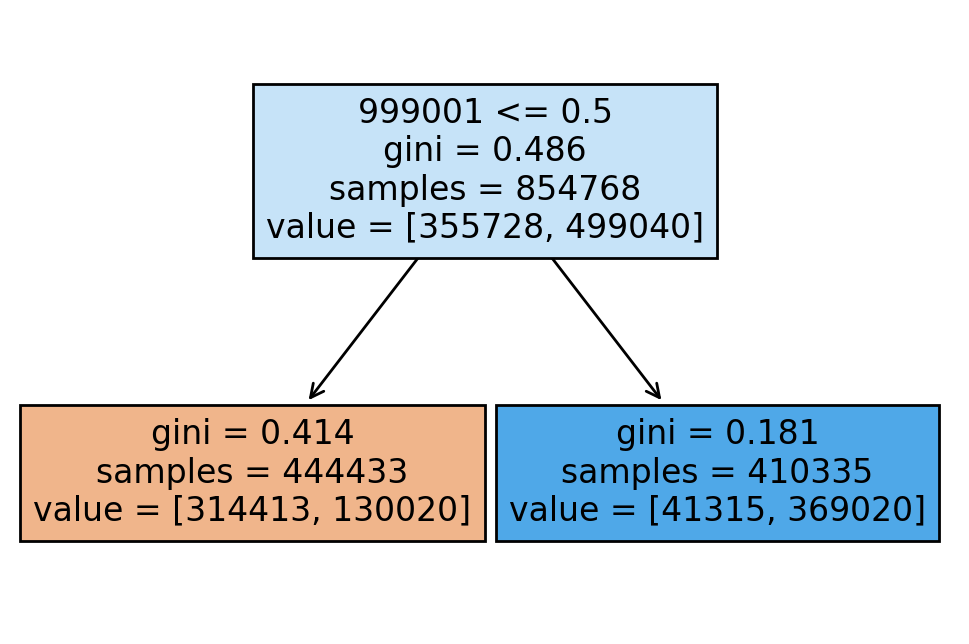

-------------------------------------------------------------
ccp_alpha =  0.18378679141528292
Decision Tree accuracy = 0.71
Decision Tree precision = 0.77
Decision Tree recall = 0.84
Number of Leaves = 1



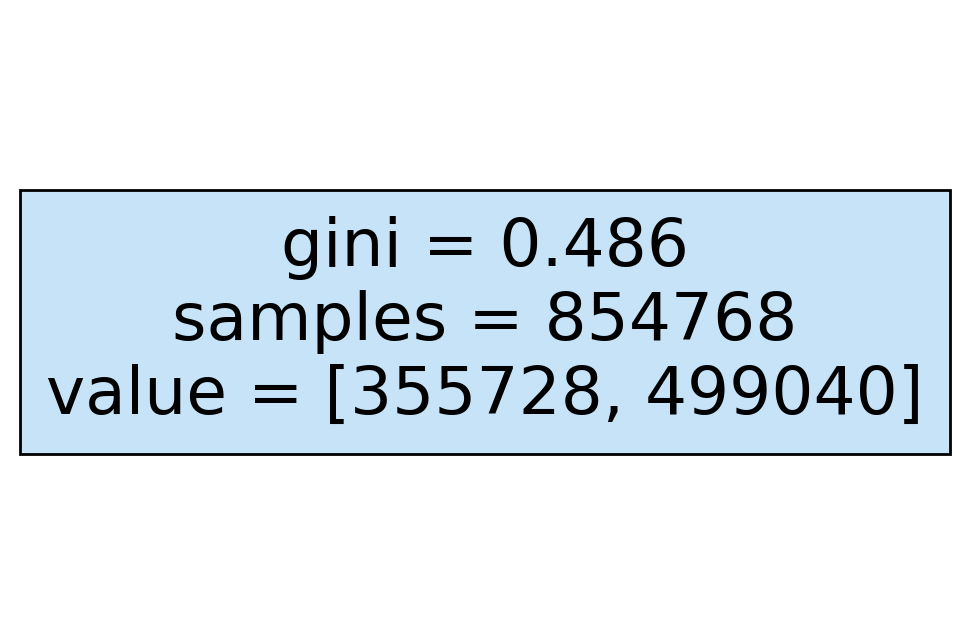

In [8]:
for hyperparameter in model.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']:
    
    cv = KFold(n_splits=5, random_state=42, shuffle=True)
    cv.get_n_splits(claims_X)
    
    accuracy = []
    precision = []
    recall = []

    for train_index, test_index in cv.split(claims_X):
        X_train, X_test = claims_X[train_index], claims_X[test_index]
        y_train, y_test = claims_y[train_index], claims_y[test_index]

        model = DecisionTreeClassifier(random_state=42, ccp_alpha=hyperparameter)

        model.fit(X_train, y_train)

        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        precision.append(precision_score(y_test, model.predict(X_test)))
        recall.append(recall_score(y_test, model.predict(X_test)))

    accuracy = np.array(accuracy)
    recall = np.array(recall)
    precision = np.array(precision)

    print('-------------------------------------------------------------')
    print(f'ccp_alpha =  {hyperparameter}')
    print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
    print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
    print(f'Decision Tree recall = {round(np.mean(recall), 2)}')
    print(f'Number of Leaves = {model.get_n_leaves()}' + '\n')
    
    names = [x.split('_')[1] for x in ohe.get_feature_names()]
    f = plt.figure(dpi=200)
    fig = model.fit(X_train, y_train)
    plot_tree(fig, filled = True, feature_names=names)
    plt.show()

## Current best model
- `ccp_alpha` set to 10^-6 for leave pruning.

ccp_alpha =  1e-06
Decision Tree accuracy = 0.94
Decision Tree precision = 0.9
Decision Tree recall = 1.0
Number of Leaves = 9



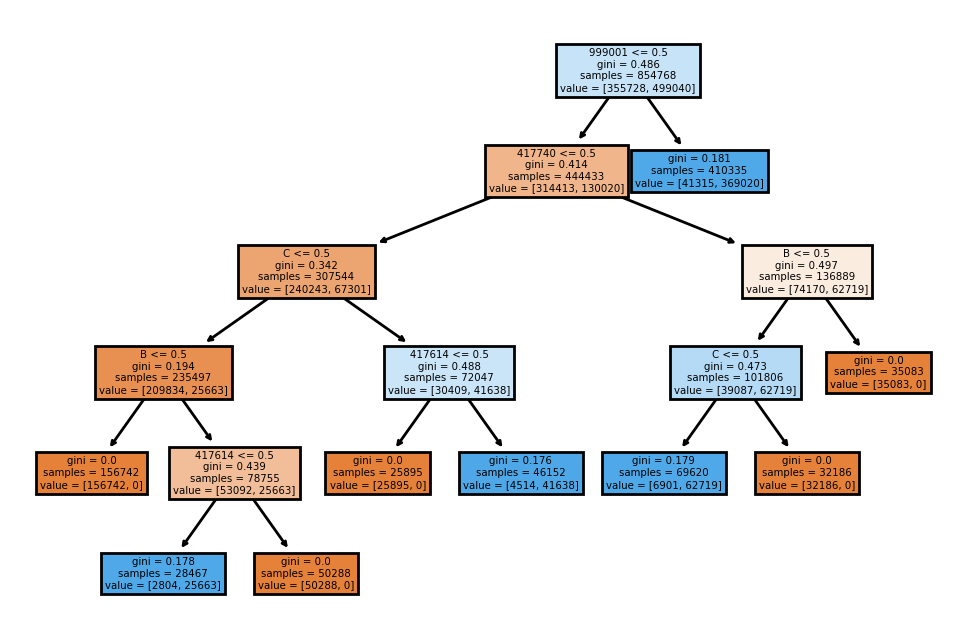

In [9]:
hyperparameter = 10**-6

cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv.get_n_splits(claims_X)

accuracy = []
precision = []
recall = []

for train_index, test_index in cv.split(claims_X):
    X_train, X_test = claims_X[train_index], claims_X[test_index]
    y_train, y_test = claims_y[train_index], claims_y[test_index]

    model = DecisionTreeClassifier(random_state=42, ccp_alpha=hyperparameter)

    model.fit(X_train, y_train)
    
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    precision.append(precision_score(y_test, model.predict(X_test)))
    recall.append(recall_score(y_test, model.predict(X_test)))

accuracy = np.array(accuracy)
recall = np.array(recall)
precision = np.array(precision)

print(f'ccp_alpha =  {hyperparameter}')
print(f'Decision Tree accuracy = {round(np.mean(accuracy), 2)}')
print(f'Decision Tree precision = {round(np.mean(precision), 2)}')
print(f'Decision Tree recall = {round(np.mean(recall), 2)}')
print(f'Number of Leaves = {model.get_n_leaves()}' + '\n')

names = [x.split('_')[1] for x in ohe.get_feature_names()]
f = plt.figure(dpi=200)
fig = model.fit(X_train, y_train)
plot_tree(fig, filled = True, feature_names=names)
plt.show()